<a href="https://colab.research.google.com/github/ShinwooChoi/ESAA/blob/main/YB0404(2)_%E1%84%91%E1%85%A7%E1%86%BC%E1%84%80%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
import pandas as pd

# 혼동 행렬 계산
cm = confusion_matrix(y, y_pred)

# 보기 좋게 DataFrame으로 출력
cm_df = pd.DataFrame(cm,
                     index=['실제: 양성(0)', '실제: 악성(1)'],
                     columns=['예측: 양성(0)', '예측: 악성(1)'])

print("혼동 행렬:")
print(cm_df)

혼동 행렬:
           예측: 양성(0)  예측: 악성(1)
실제: 양성(0)        337         20
실제: 악성(1)         30        182


* 정확도

In [4]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# 정확도 계산
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"정확도: {accuracy:.4f}")

정확도: 0.9121


* 정밀도
 - 양성(=악성으로 표시한) 예측 중 실제로 악성인 비율

In [5]:
from sklearn.metrics import precision_score

# 정밀도 계산
precision = precision_score(y, y_pred)
print(f"정밀도: {precision:.4f}")

정밀도: 0.9010


* 재현율
 - 실제 악성 중에서 모델이 정확히 악성이라고 예측한 비율

In [7]:
from sklearn.metrics import recall_score

# 재현율 계산
recall = recall_score(y, y_pred)
print(f"재현율: {recall:.4f}")

재현율: 0.8585


* F1 score
 - **정밀도(Precision)**와 **재현율(Recall)**의 조화 평균. 두 성능 지표 간의 균형을 보고 싶을 때 유용
 - 정밀도와 재현율이 비슷할수록 높아지고, 하나라도 낮으면 같이 떨어짐

In [8]:
from sklearn.metrics import f1_score

# F1-score 계산
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.4f}")

F1-score: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [36]:
from sklearn.preprocessing import Binarizer
y_pred_proba = model_lor.predict_proba(X)

binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.fit_transform(y_pred_proba[:, [0]])
y_pred2 = y_pred2.ravel()

In [46]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
def get_clf_eval(y, y_pred2):
  confusion = confusion_matrix(y, y_pred2)
  accuracy = accuracy_score(y, y_pred2)
  precision = precision_score(y, y_pred2)
  recall = recall_score(y, y_pred2)
  f1 = f1_score(y, y_pred2)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))


get_clf_eval(y, y_pred2)


오차 행렬
[[  1 356]
 [139  73]]
정확도: 0.1301, 정밀도: 0.1702, 재현율: 0.3443, F1: 0.2278


* ROC 곡선 시각화

In [35]:
from sklearn.metrics import roc_curve


In [14]:
import matplotlib.pyplot as plt


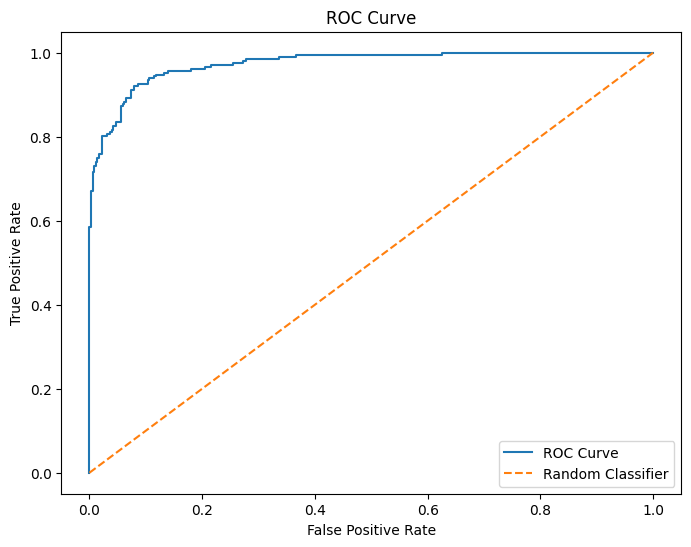

In [20]:
y_scores = model_lor.predict_proba(X)[:, 1]

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

* ROC AUC 값

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y, y_scores)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9741
